In [92]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")
source("R/prism_compat.R")
theme_set(theme_prism(base_size=20))
options(repr.plot.width=15, repr.plot.height=15)

In [100]:
experiments <- c("24hr LTM")
trainings <- c("6X_Massed", "6X_Spaced")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
intervals <- c("No_stimulator")
data <- data.table::fread(file = "tidy_data_wide.csv")

In [101]:
data$Training <- factor(data$Training, levels=trainings)

In [102]:
data$interval

[1] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
  [5] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
  [9] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [13] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [17] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [21] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [25] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [29] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [33] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [37] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [41] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [45] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [49] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [53] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [57] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [61] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [65] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [69] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [73] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [77] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [81] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [85] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [89] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [93] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
 [97] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[101] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[105] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[109] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[113] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[117] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[121] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[125] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[129] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[133] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[137] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[141] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[145] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[149] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[153] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[157] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[161] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[165] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[169] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[173] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[177] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[181] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[185] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[189] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[193] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[197] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[201] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[205] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[209] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[213] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[217] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[221] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[225] "No_stimulator" "No_stimulator" "No_stimulator" "No_stimulator"
[229] "No_st

In [103]:
panel4_data <- data[Training %in% trainings & Genotype %in% genotypes & interval %in% intervals  & experiment %in% experiments & region_id != "NONE",]

In [104]:
panel4_data[, .(.N, mean(POST)), by=.(Training, Files)]

Training,Files,N,V2
<fct>,<chr>,<int>,<dbl>
6X_Spaced,2023-07-12_14-25-09(ET_spaced_overnight),6,-0.15800000
6X_Spaced,2023-07-13_16-05-32(ET_spaced_overnight),4,-0.16250000
6X_Spaced,2023-07-18_15-25-46(ET_LTM_spaced),1,-0.09523810
6X_Massed,2023-07-23_16-20-43(ESB-massed),12,-0.16843735
6X_Massed,2023-07-24_16-19-01(ESB-massed),5,-0.03142857
6X_Massed,2023-09-14_15-13-25_AOJ_6XMASSED_LTM,2,-0.08325000
6X_Spaced,2023-09-22_17-35-12(ET_AOJ_LTM_SD),2,0.06250000
6X_Spaced,2024-10-07_14-42-08_AOJ_6X_spaced_24hrLTM,1,-0.26666667
6X_Spaced,2024-10-09_14-14-49_AOJ_ET_6X_spaced_24hrLTM,4,-0.03055556


In [105]:
panel4_data[Files=="2024-10-12_14-35-24_AOJ_6X_spaced_24hrLTM", .(ROI, POST)]

ROI,POST
<int>,<dbl>
5,-0.25000000
7,-0.30000000
8,0.10000000
14,0.00000000
16,0.00000000
17,-0.02857143
18,0.00000000


In [106]:
nrow(panel4_data[Training == "6X_Massed" & region_id!="NONE" ,.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)])

[1] 19

In [107]:
A <- panel4_data[Training == "6X_Massed" & region_id!="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel4_data[Training == "6X_Spaced" & region_id!="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
X<-Cbind(Ad, Bd)
colnames(X) <- trainings

In [108]:
data.table::fwrite(x = A, file="prism/Fig4/Figure_4A_6X_Massed.csv")
data.table::fwrite(x = B, file="prism/Fig4/Figure_4A_6X_Spaced.csv")
data.table::fwrite(x = X, file="prism/Fig4/Figure_4_boxplot.csv")

In [109]:
panel4_data_long <- melt(panel4_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

[1] -1  1
[1] 0.7


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars  N test            PI   PI_median
1: 6X_Massed        0.5      0.0107     * 19  PRE  0.0002639933  0.00000000
2: 6X_Massed        0.5      0.0107     * 19 POST -0.1234153186 -0.07142857
3: 6X_Spaced        0.5      0.0017   *** 25  PRE  0.0217295815  0.04450000
4: 6X_Spaced        0.5      0.0017   *** 25 POST -0.0974279365 -0.02857143
       PI_std  std_error x
1: 0.09358860 0.02147070 1
2: 0.23362177 0.05359651 2
3: 0.08136329 0.01627266 1
4: 0.17221298 0.03444260 2


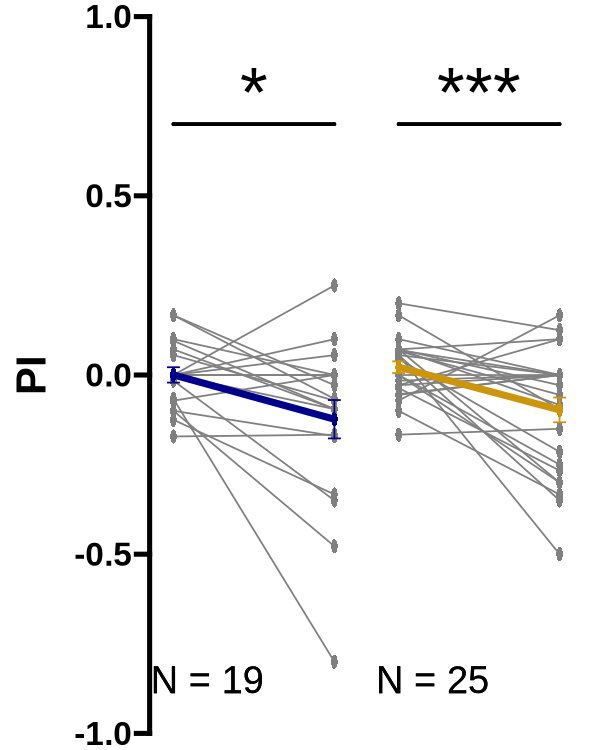

In [111]:
size_unit=2.5
ratio=2.5

panel4A <- learning_plot(
    data=panel4_data_long, "Training",
    textsize=8,
    hjust_text = 0.2,
    y_annotation=.7,
    y_limits=c(-1, 1),
    colors=colors_panel4[1:length(trainings)]    
)
options(repr.plot.width=size_unit*panel4A$n_facets, repr.plot.height=size_unit*ratio)

save_learning_plot(plot=panel4A, filename = "prism/Fig4/panel4A.svg", size_unit = size_unit, ratio = ratio)
panel4A

In [112]:
summ_statistics <- panel4_data_long[test=="POST", .(PI=mean(PI), stderror=sd(PI)/sqrt(.N)), by=experiment]

In [113]:
# panel4_data[, .(Files, ROI)]

In [114]:
dt_bin <- readRDS("dt_bin.RDS")
metadata_no_training <- dt_bin[,meta=T][ROI=="NONE",]
metadata <- dt_bin[,meta=T][ROI!="NONE",]

In [115]:
metadata <- merge(
    panel4_data[, .(Files, ROI=as.character(ROI))],
    metadata,
    by=c("Files", "ROI"), all.x=TRUE, all.y=FALSE
)
# flies in metadata with Training = NA are flies that are dropped in previous notebooks bcs they dont pass the criteria
metadata$ROI <- as.character(metadata$ROI)
metadata <- rbind(metadata, metadata_no_training)

In [116]:
setkey(metadata, id)
setmeta(dt_bin, metadata)

In [117]:
dt_bin<-dt_bin[!is.na(xmv(Training)),]

In [119]:
id<-"id"
group <- "Training"

dt_bin_full <- behavr::rejoin(dt_bin)
table(dt_bin_full$Training)

dt_bin_full_wide <- add_ghost_data(dt_bin_full, id=id, x="t", columns=c("asleep"), group=group, to_wide=TRUE)
    
dt_bin_full_wide$zt <- dt_bin_full_wide$t/3600
out <- dt_bin_full_wide[ , setdiff(colnames(dt_bin_full_wide), c("zt", "t")), with=FALSE]
print(dim(out))


A <- dt_bin_full[Training == "6X_Spaced", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
B <- dt_bin_full[Training == "6X_Massed", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]
C <- dt_bin_full[Training == "No_training", .(Files, ROI, User, Genotype, Training, experiment, t, asleep, id, region_id, machine_name)]


No_training   6X_Massed   6X_Spaced 
       1442         923        1126 

       group__ n_flies max diff
1: No_training      31  31    0
2:   6X_Massed      19  31   12
3:   6X_Spaced      25  31    6
[1] 1
[1] 1
[1] 1
[1] "No_training" "6X_Massed"   "6X_Spaced"  
[1] 55 31
[1] 55 31
[1] 55 31
[1] 55 93


In [120]:
data.table::fwrite(x = out, file="prism/Fig4/Figure_4B_sleep.csv")
data.table::fwrite(x = A, file="prism/Fig4/Figure_4B_6X_Spaced.csv")
data.table::fwrite(x = B, file="prism/Fig4/Figure_4B_6X_Massed.csv")
data.table::fwrite(x = C, file="prism/Fig4/Figure_4B_No_training.csv")

In [121]:
sem <- function(x) {
    return(sd(x) / sqrt(length(x)))
    
}
summ_data <- dt_bin_full[, .(id, t, asleep, Training)][, .(mu=mean(asleep), sem=sem(asleep)), by=.(t, Training)]
summ_data$Training<-factor(as.character(summ_data$Training), levels=c(trainings, "No_training"))

panel4_sleep_trace <- ggplot(data=summ_data, aes(x=t, y=mu, col=Training)) +
    geom_line(linewidth=2) + geom_point() +
    scale_x_hours(name="ZT", breaks=behavr::hours(seq(4, 30, 4))) +
    geom_errorbar(aes(x=t, ymin=mu-sem, ymax=mu+sem), linewidth=1) +
    scale_color_manual(values=colors_panel4[1:3]) +
    scale_y_continuous(name="Time asleep per 30 min bin (mins)")

In [124]:
sleep_zt05_zt11 <- dt_bin_full[(t >= behavr::hours(5)) & (t < behavr::hours(11)) , .(asleep = sum(asleep)), by=.(id, Training, Files, ROI)]
sleep_zt05_zt11$Training<-factor(as.character(sleep_zt05_zt11$Training), levels=c(trainings, "No_training"))

In [125]:
A <- sleep_zt05_zt11[Training == "6X_Massed" , asleep]
B <- sleep_zt05_zt11[Training == "6X_Spaced" , asleep]
C <- sleep_zt05_zt11[Training == "No_training" , asleep]
X <- Cbind(A, B, C)
colnames(X) <- c("6X_Massed", "6X_Spaced", "No training")

In [126]:
data.table::fwrite(x=X, file = "prism/Fig4/Figure_4_boxplot_sleep.csv")

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
    id   group__         PRE       POST        dPI outlier
1: 428 6X_Spaced  0.05550000 -0.5000000 -0.5555000    TRUE
2: 464 6X_Massed -0.06666667 -0.8000000 -0.7333333    TRUE
3: 465 6X_Massed  0.00000000  0.2500000  0.2500000    TRUE
4: 551 6X_Spaced -0.07142857  0.1666667  0.2380952    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 2


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

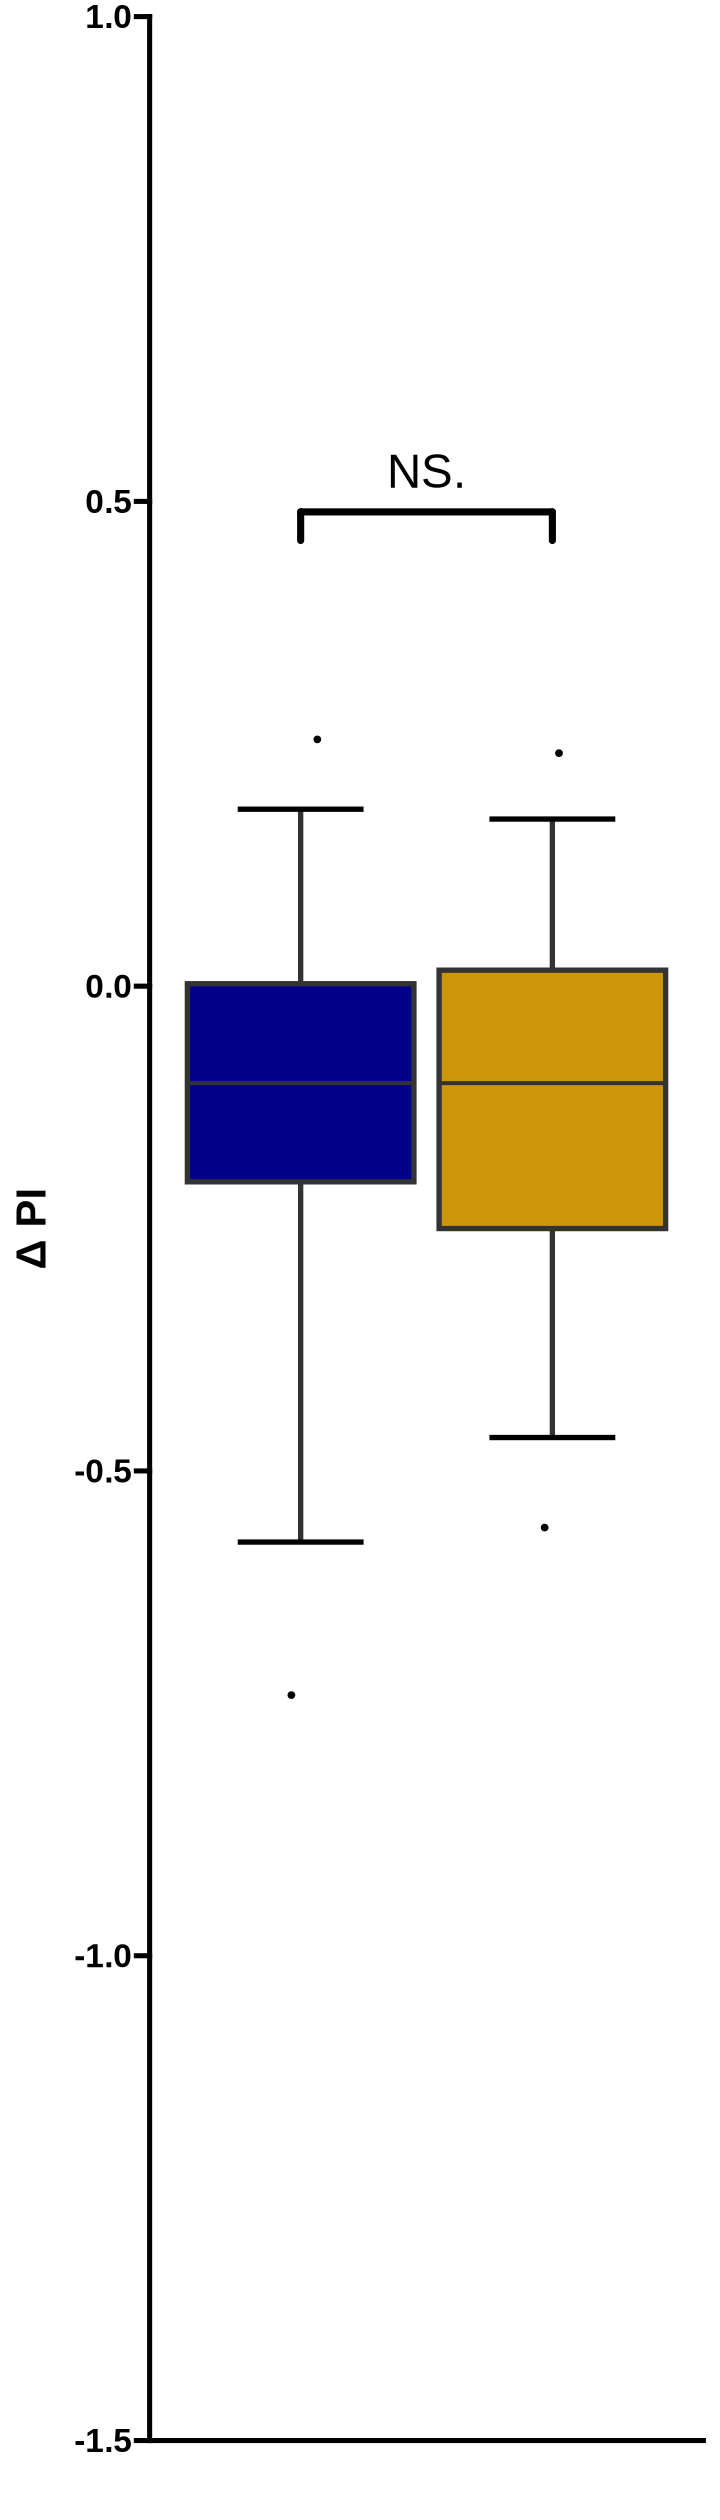

In [127]:
ratio=7
size_unit=3
panel4B <- summary_plot(
    data=panel4_data_long,
    group = "Training", 
    comparisons = list(
        c("6X_Massed", "6X_Spaced")
    ),
    map_signif_level=T,
    annotation_y=c(0.44),
    test=unpaired_t_test,
    colors=colors_panel4[1:length(trainings)],
    x_labels_angle=45,
    y_limits=c(-1.5, 1),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975)
)
panel4B$gg <- panel4B$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel4B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel4B
save_summ_plot(plot=panel4B, filename = "prism/Fig4/panel4B.svg", size_unit=size_unit, ratio=ratio)

In [128]:
preprocess_function <-  function(data, group, test, value.var="PI") {
    data$group__ <- data[[group]]
    data[[paste0("d", value.var)]] <- data$asleep
    return(data)
}


In [129]:
sleep_zt05_zt11[, .(.N), by=.(Training, Files)][order(Training, Files),]

Training,Files,N
<fct>,<chr>,<int>
6X_Massed,2023-07-23_16-20-43(ESB-massed),12
6X_Massed,2023-07-24_16-19-01(ESB-massed),5
6X_Massed,2023-09-14_15-13-25_AOJ_6XMASSED_LTM,2
6X_Spaced,2023-07-12_14-25-09(ET_spaced_overnight),6
6X_Spaced,2023-07-13_16-05-32(ET_spaced_overnight),4
6X_Spaced,2023-07-18_15-25-46(ET_LTM_spaced),1
6X_Spaced,2023-09-22_17-35-12(ET_AOJ_LTM_SD),2
6X_Spaced,2024-10-07_14-42-08_AOJ_6X_spaced_24hrLTM,1
6X_Spaced,2024-10-09_14-14-49_AOJ_ET_6X_spaced_24hrLTM,4


In [153]:
sleep_zt05_zt11[, .(.N), by=.(Training)][order(Training),]

Training,N
<fct>,<int>
6X_Massed,19
6X_Spaced,25
No_training,31


Warning message:
“The following aesthetics were dropped during statistical transformation: x and
y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


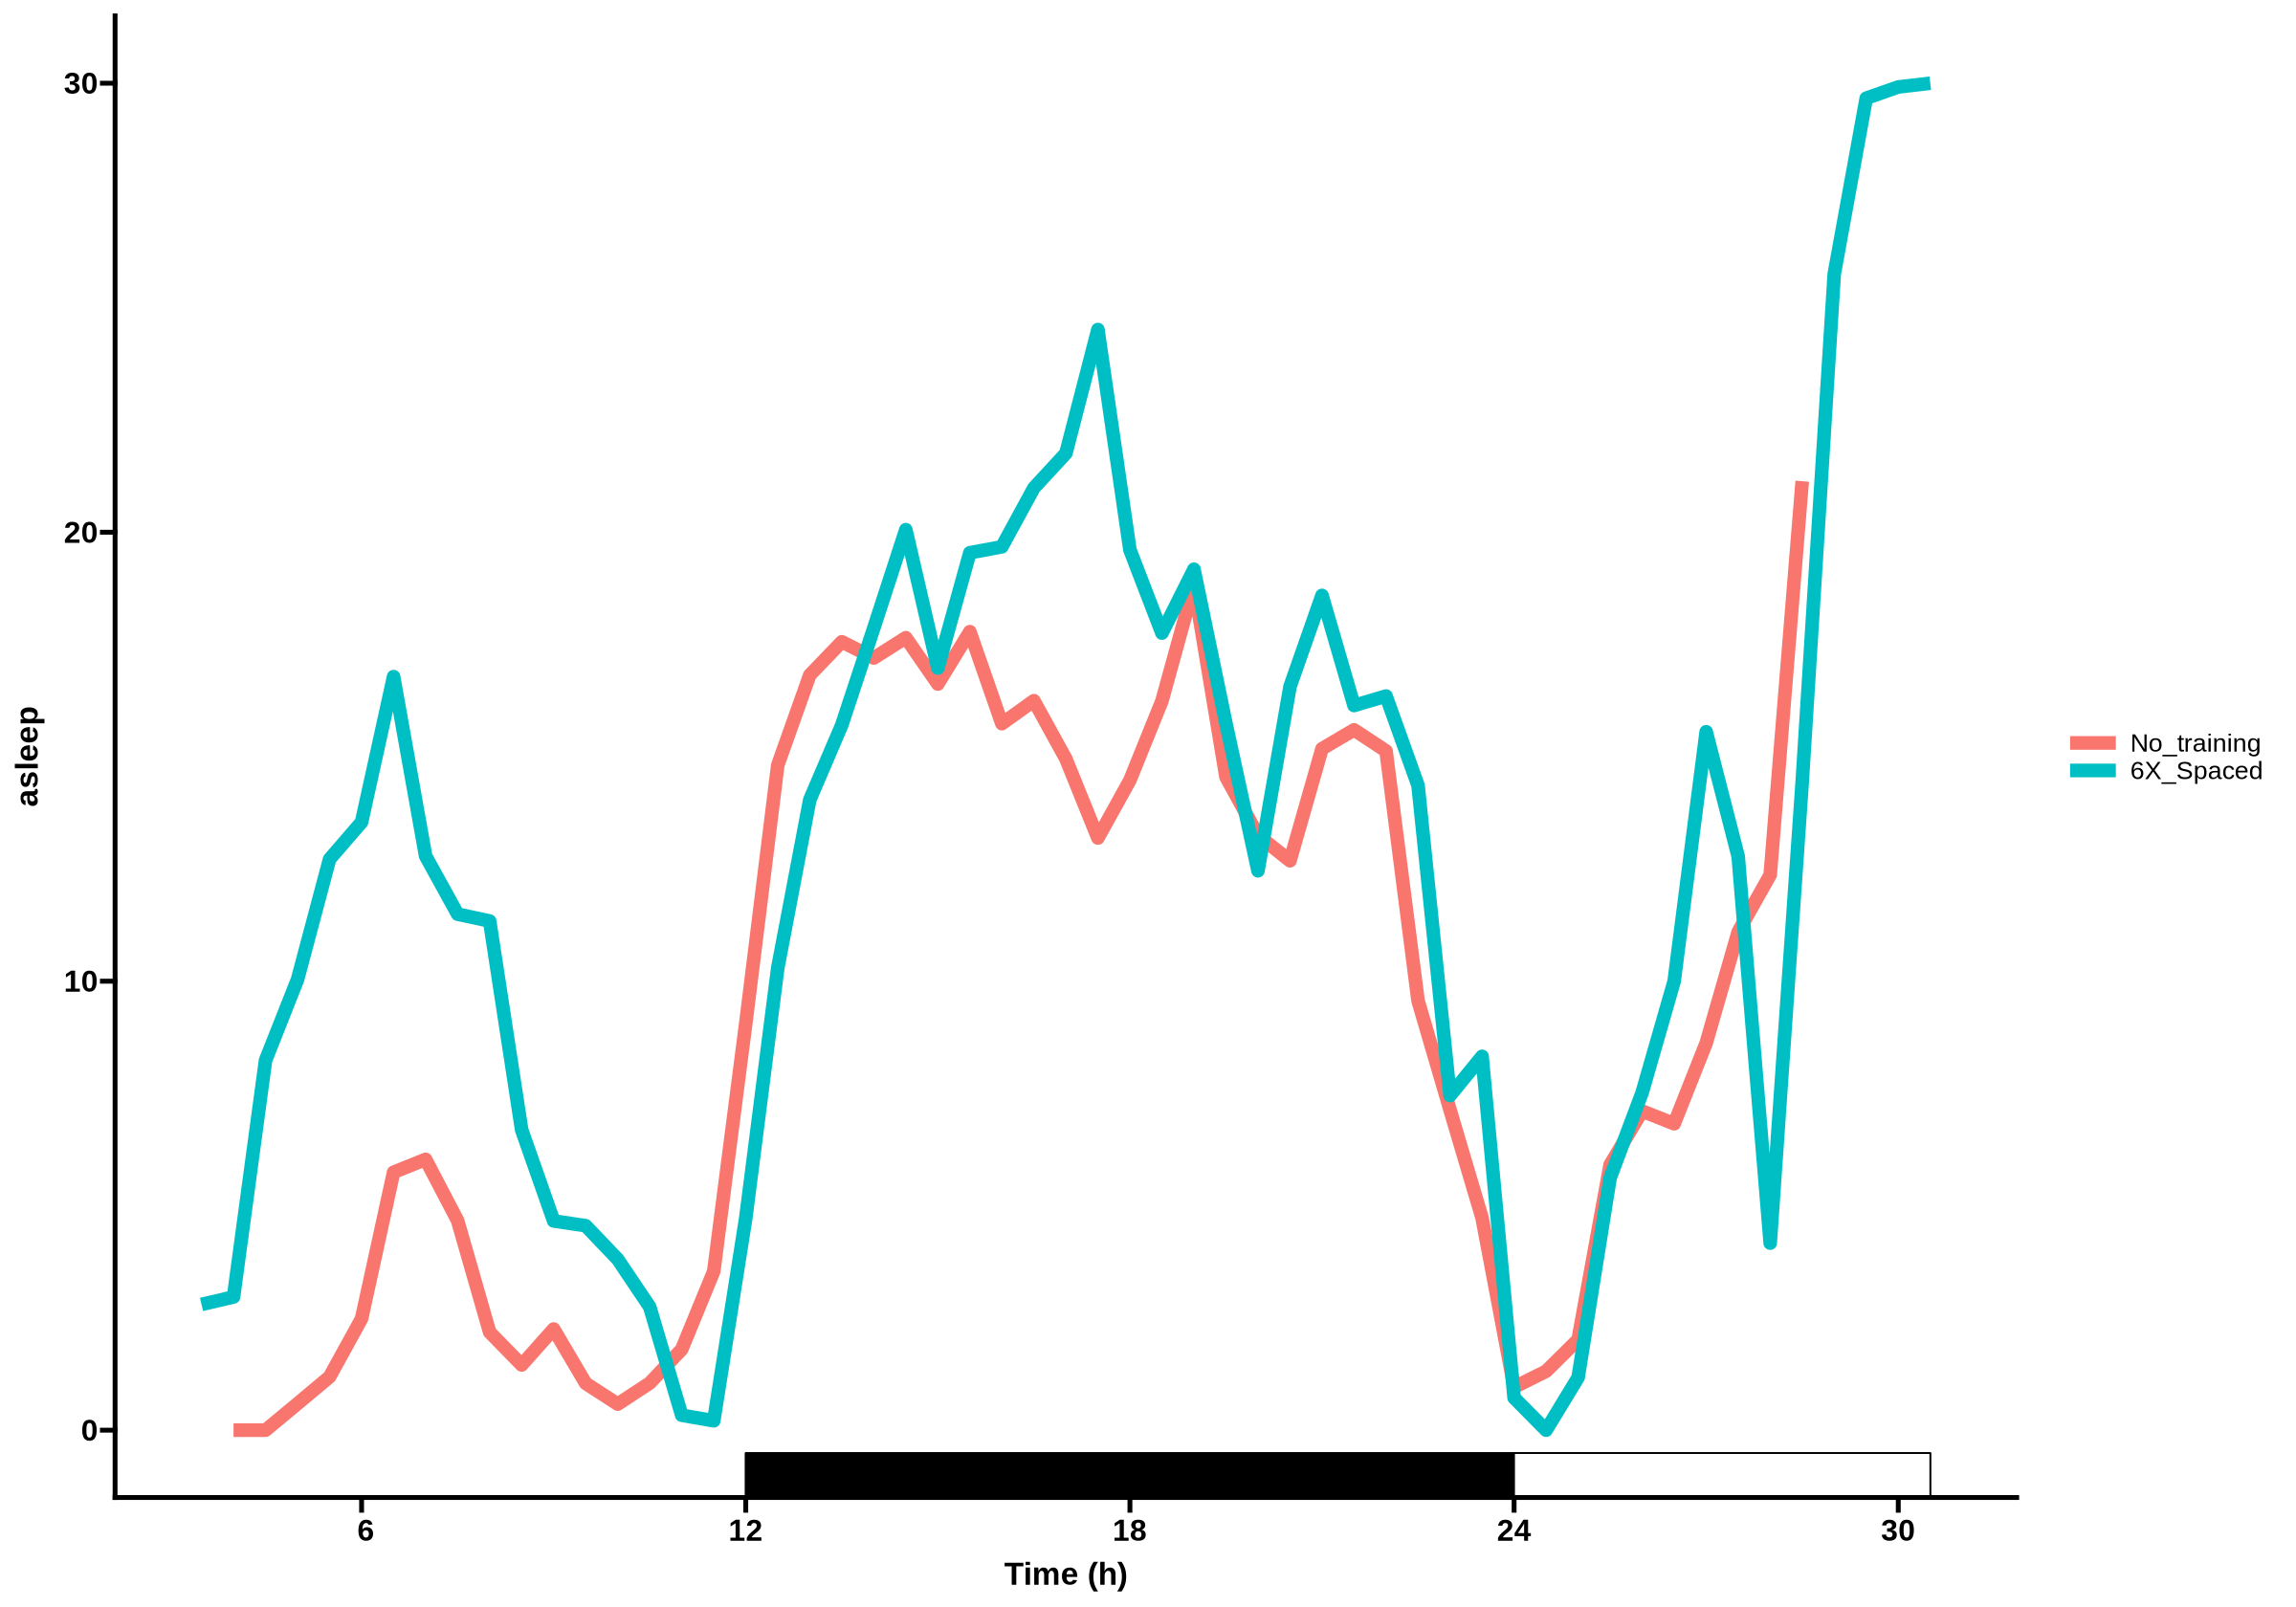

In [150]:
options(repr.plot.width=20)
ggplot(data=dt_bin_full[Training!="6X_Massed",], aes(x=t, y=asleep, col=Training)) + geom_pop_etho(se=F, linewidth=4) + scale_x_hours() + stat_ld_annotations()# + facet_grid(Files ~ .)

Warning message:
“The following aesthetics were dropped during statistical transformation: x and
y.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


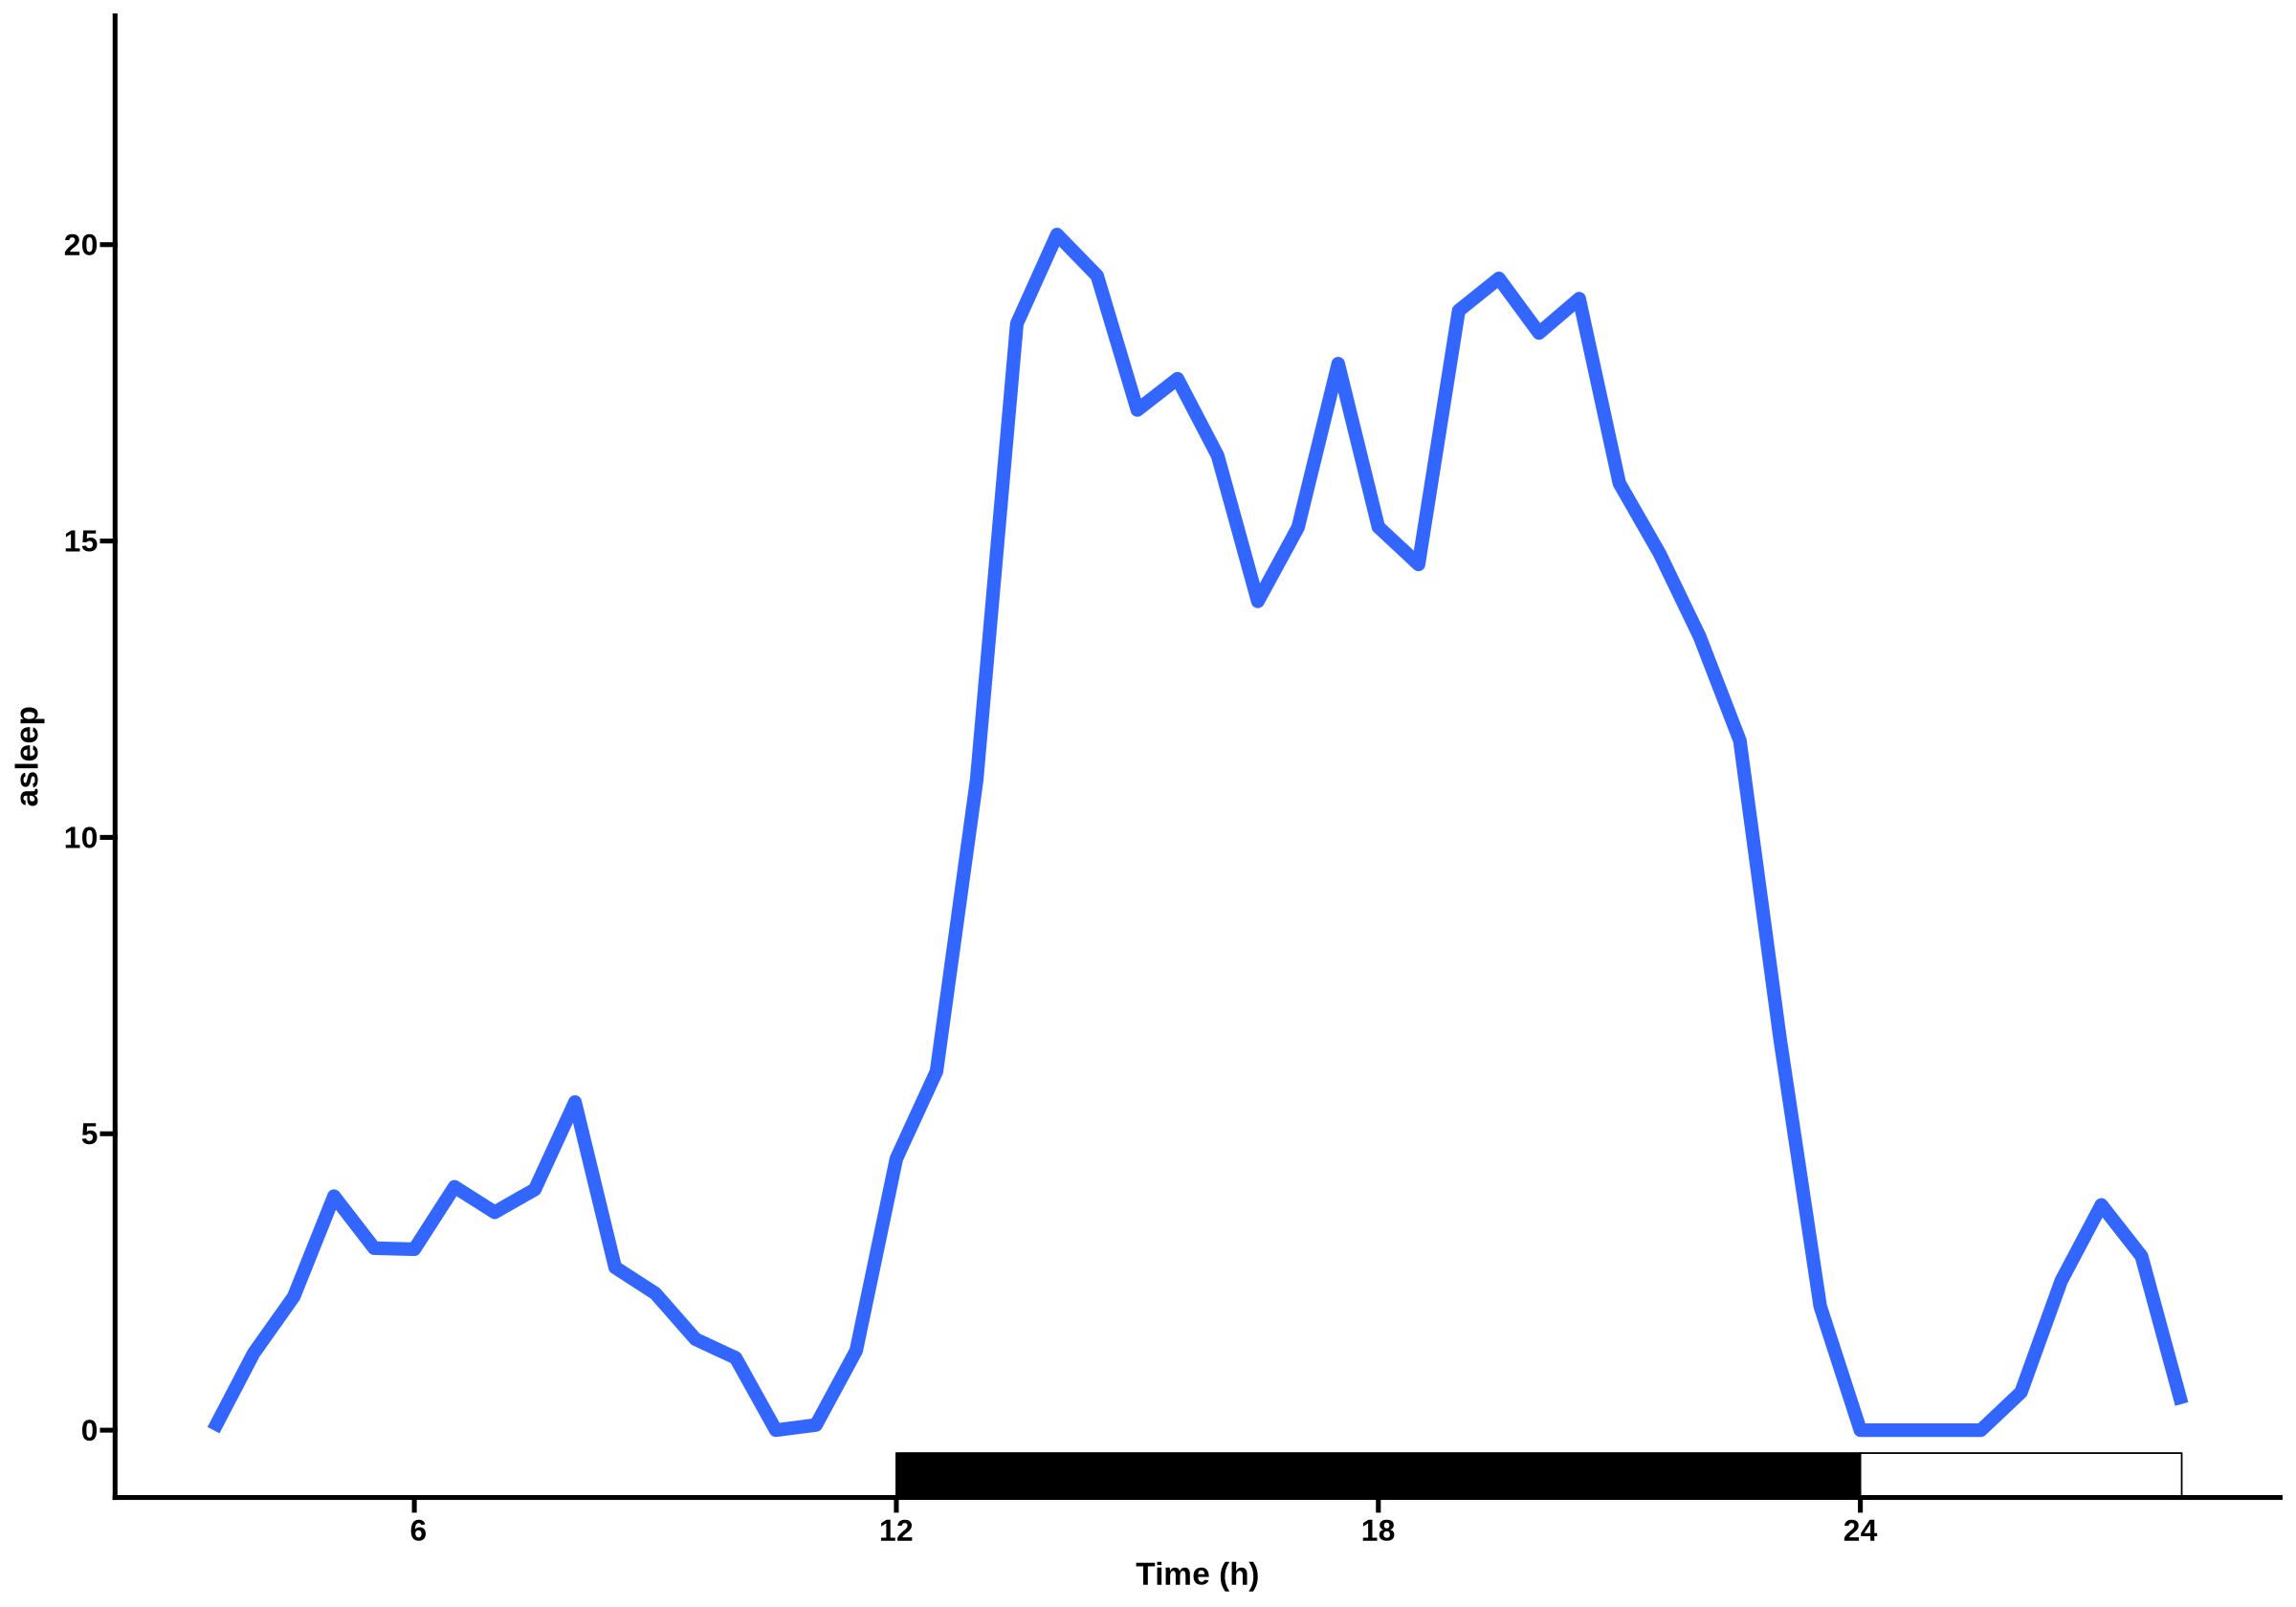

In [148]:
ggplot(data=dt_bin_full[Training=="6X_Massed",], aes(x=t, y=asleep)) + geom_pop_etho(se=F, linewidth=4) + scale_x_hours() + stat_ld_annotations()# + facet_grid(Files ~ .)

In [130]:
sleep_zt05_zt11[ROI!="NONE", .N, by=Files]

Files,N
<chr>,<int>
2023-07-12_14-25-09(ET_spaced_overnight),6
2023-07-13_16-05-32(ET_spaced_overnight),4
2023-07-18_15-25-46(ET_LTM_spaced),1
2023-07-23_16-20-43(ESB-massed),12
2023-07-24_16-19-01(ESB-massed),5
2023-09-14_15-13-25_AOJ_6XMASSED_LTM,2
2023-09-22_17-35-12(ET_AOJ_LTM_SD),2
2024-10-07_14-42-08_AOJ_6X_spaced_24hrLTM,1
2024-10-09_14-14-49_AOJ_ET_6X_spaced_24hrLTM,4


Warning message in `[.data.table`(data, , `:=`(outlier, FALSE)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”


[1] "Outliers: "
                              id    Training
1: 2023-07-12_15-08-04_036aad|03   6X_Spaced
2: 2023-07-12_15-08-04_036aad|14 No_training
3: 2023-07-24_15-17-20_036aad|16   6X_Massed
                                        Files  ROI   asleep     group__
1:   2023-07-12_14-25-09(ET_spaced_overnight)    3 198.0000   6X_Spaced
2: 2023-07-12_14-25-09_e36_roi_14-IDOC_roi_NA NONE 135.1667 No_training
3:            2023-07-24_16-19-01(ESB-massed)   16 201.0000   6X_Massed
        dPI outlier
1: 198.0000    TRUE
2: 135.1667    TRUE
3: 201.0000    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

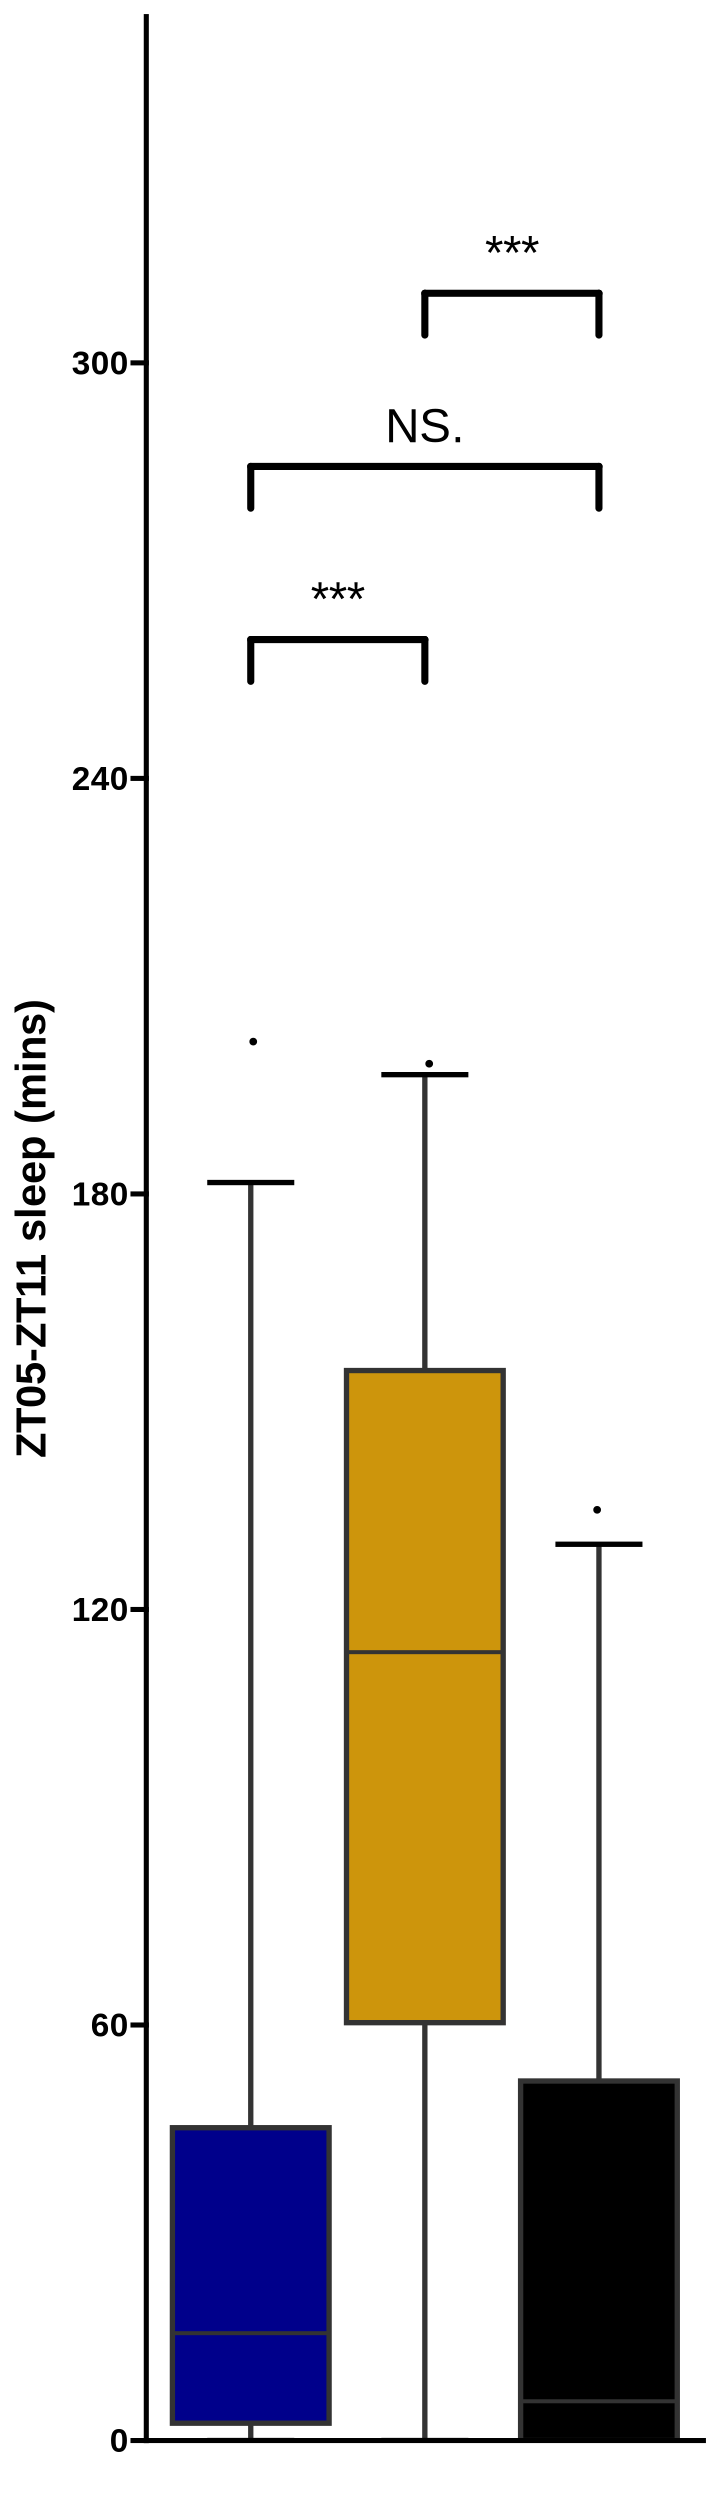

In [131]:
ratio=7
size_unit=3
panel4_boxplot_sleep <- summary_plot(
    data=sleep_zt05_zt11,
    group = "Training", 
    comparisons = list(
        c("6X_Massed", "6X_Spaced"),
        c("No_training", "6X_Spaced"),      
        c("6X_Massed", "No_training")
    ),
    map_signif_level=T,
    annotation_y=c(250, 300, 275),
    test=unpaired_t_test,
    colors=colors_panel4[1:3],
    x_labels_angle=45,
    y_limits=c(0, 350),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975),
    preprocess_function=preprocess_function,
    y_axis_label="ZT05-ZT11 sleep (mins)",
    y_breaks=seq(0, 300, 60)
)
panel4_boxplot_sleep$gg <- panel4_boxplot_sleep$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel4B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel4_boxplot_sleep
save_summ_plot(plot=panel4_boxplot_sleep, filename = "prism/Fig4/panel4_boxplot_sleep.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.te

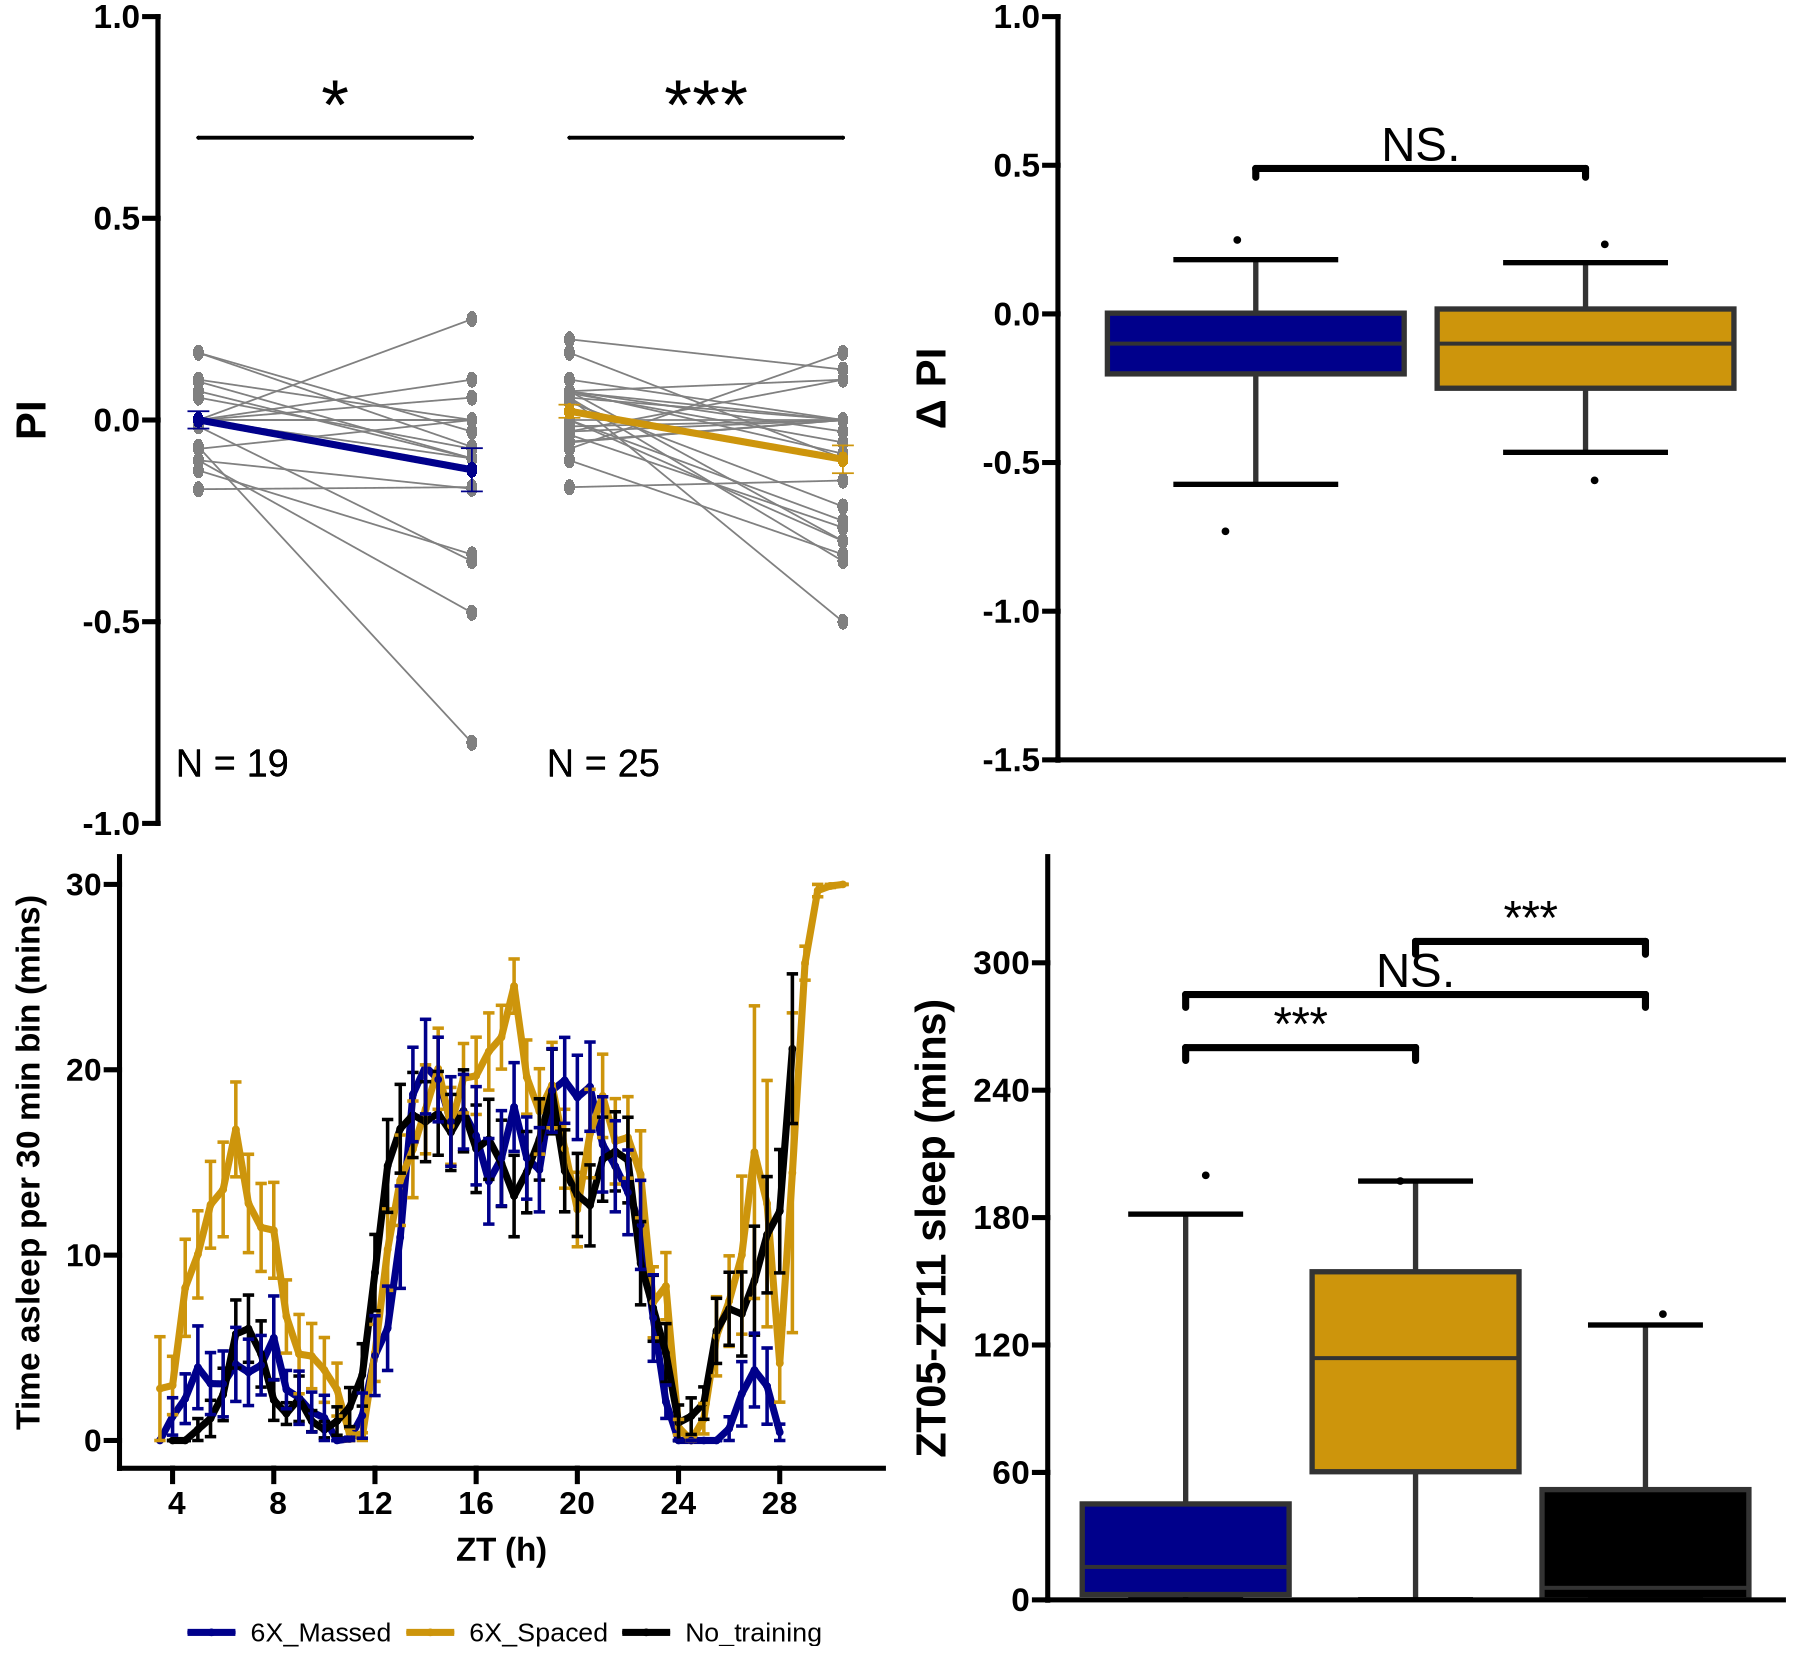

In [132]:
options(repr.plot.width=15)
options(repr.plot.height=14)
gg <- cowplot::plot_grid(
    cowplot::plot_grid(panel4A$gg, panel4B$gg, ncol=2),
    cowplot::plot_grid(
        panel4_sleep_trace + theme(legend.position="bottom", legend.direction="horizontal"),
        panel4_boxplot_sleep$gg,
        ncol=2
    ),
    nrow=2
)
ggsave(plot = gg, filename = "figures/Figure_4.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg

In [63]:
PI_data <- panel4_data_long[, .(Files, ROI,  PI, test)][test=="POST",]

In [64]:
dt <- merge(
    sleep_zt05_zt11[ROI!="NONE", .(id, Training, Files, ROI=as.integer(ROI), asleep)],
    PI_data, by=c("Files", "ROI")
)

`geom_smooth()` using formula = 'y ~ x'
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


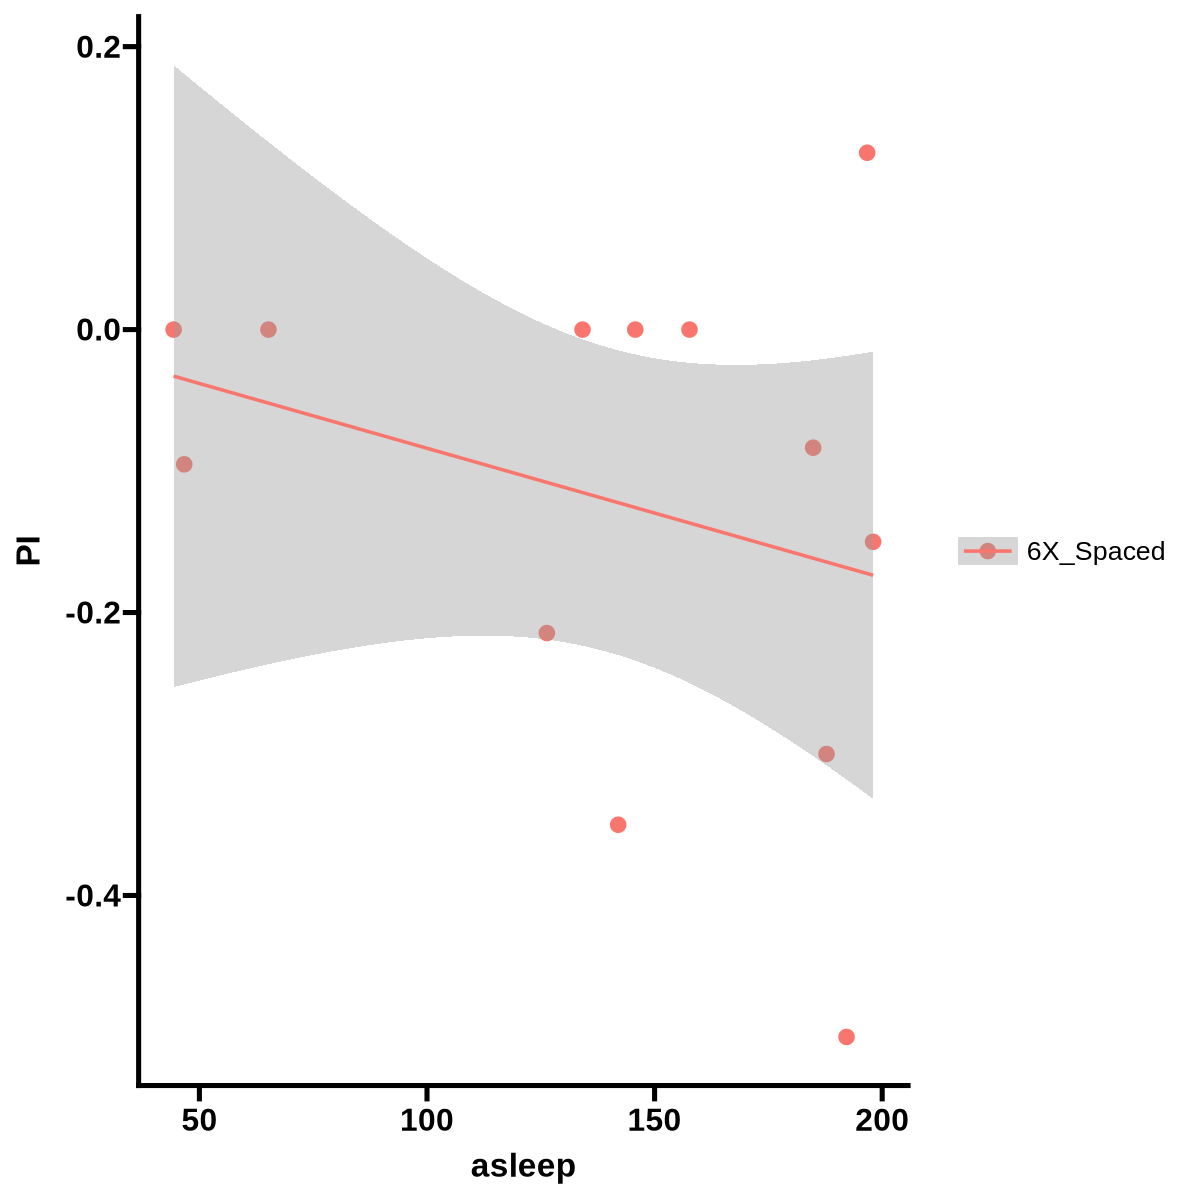

In [65]:
options(repr.plot.height=10, repr.plot.width=10)
ggplot(data=dt[Training=="6X_Spaced",], aes(x=asleep, y=PI, color=Training)) + geom_point(size=4) + geom_smooth(method="lm")

In [ ]:
cor(dt[Training=="6X_Spaced",]$PI, dt[Training=="6X_Spaced",]$asleep)**2

In [ ]:
dt[Training=="6X_Spaced",][order(PI),]